## M11-L2 Problem 1

In this problem you will implement the elbow method using three different sklearn clustering algorithms: (`KMeans`, `SpectralClustering`, `GaussianMixture`). You will use the algorithms to find the number of natural clusters for two different datasets, one "blob" shaped dataset, and one concetric circle dataset.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture

def plot_loss(loss, ax = None, title = None):
    if ax is None:
        ax = plt.gca()
    ax.plot(np.arange(2, len(loss)+2), loss, 'k-o')
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Loss')
    if title:
        ax.set_title(title)
    return ax

def plot_pred(x, labels, ax = None, title = None):
    if ax is None:
        ax = plt.gca()
    n_clust = len(np.unique(labels))
    for i in range(n_clust):
        ax.scatter(x[labels == i,0], x[labels == i,1], alpha = 0.5)
    ax.set_title(title)
    return ax

def compute_loss(x, labels):
    # Initialize loss
    loss = 0
    # Number of clusters
    n_clust = len(np.unique(labels))
    # Loop through the clusters
    for i in range(n_clust):
        # Compute the center of a given label
        center = np.mean(x[labels == i, :], axis = 0)
        # Compute the sum of squared distances between each point and its corresponding cluster center
        loss += np.sum(np.linalg.norm(x[labels == i, :] - center, axis = 1)**2)
    return loss


## Blob dataset

Visualize the "blob" dataset generated below, using a unique color for each cluster of points, where `y` contains the label of each corresponding point in `x`.

In [33]:
## DO NOT MODIFY
x, y = make_blobs(n_samples = 1000, n_features = 2, centers = [[0,0],[2,2],[1,-2],[4,0],[-2,-1],[-1,3]], cluster_std = [0.6,0.4,0.6,1.5,0.3,0.8], random_state = 0)

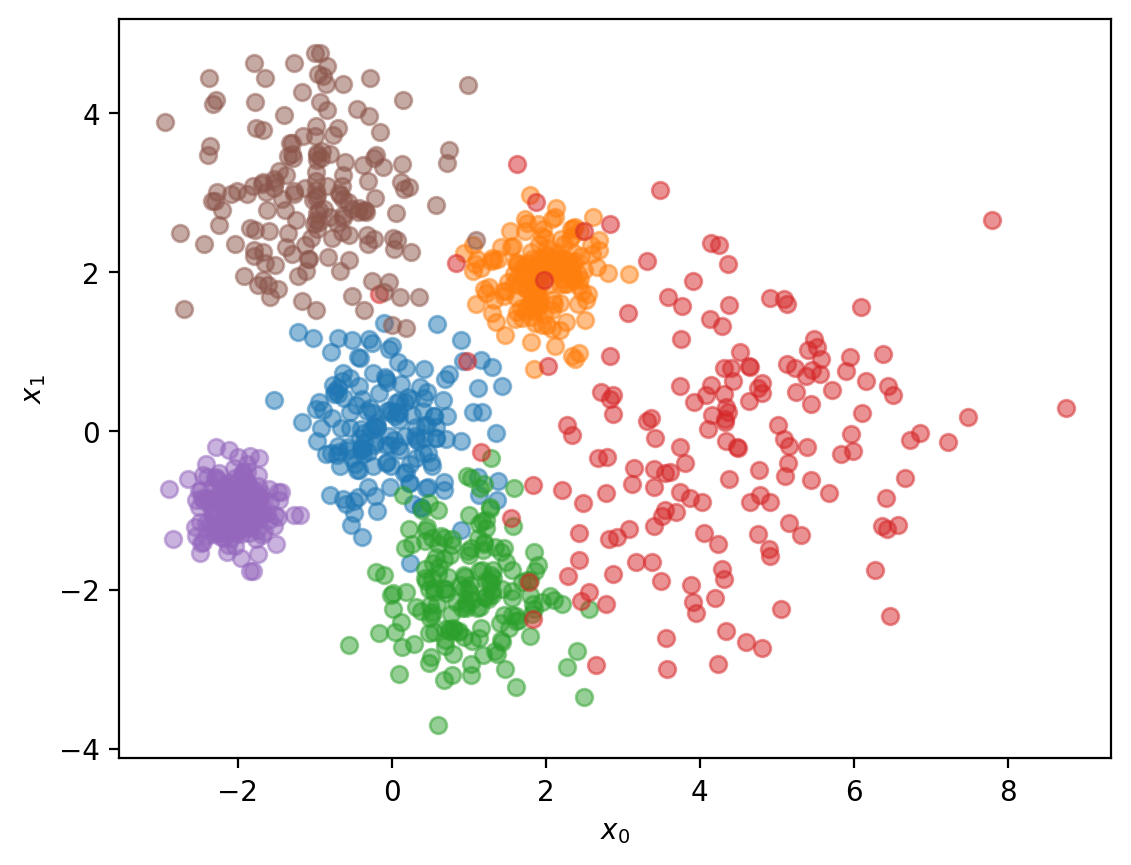

In [34]:
## YOUR CODE GOES HERE
def plotter(x, y, labels=None, centers=None):
    fig = plt.figure(dpi=200)
    for i in range(len(np.unique(y))):
        if labels is not None:
            plt.scatter(x[labels == i, 0], x[labels == i, 1], alpha=0.5)
        else:
            plt.scatter(x[y == i, 0], x[y == i, 1], alpha=0.5)
    if labels is not None:
        if (labels != y).any():
            plt.scatter(x[labels != y, 0], x[labels != y, 1], s=100, c='None', edgecolors='black', label='Misclassified Points')
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c='red', label='Cluster Centers')
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    if labels is not None or centers is not None:
        plt.legend()
    plt.show()

plotter(x, y)

Use the `sklearn` KMeans, Spectral Clustering, and Gaussian Mixture Model functions to cluster the "blob" data with 6 clusters, and modify the parameters until you get satisfactory results. Plot the results of your three models side-by-side using `plt.subplots` and the provided `plot_pred(x, labels, ax, title)` function.

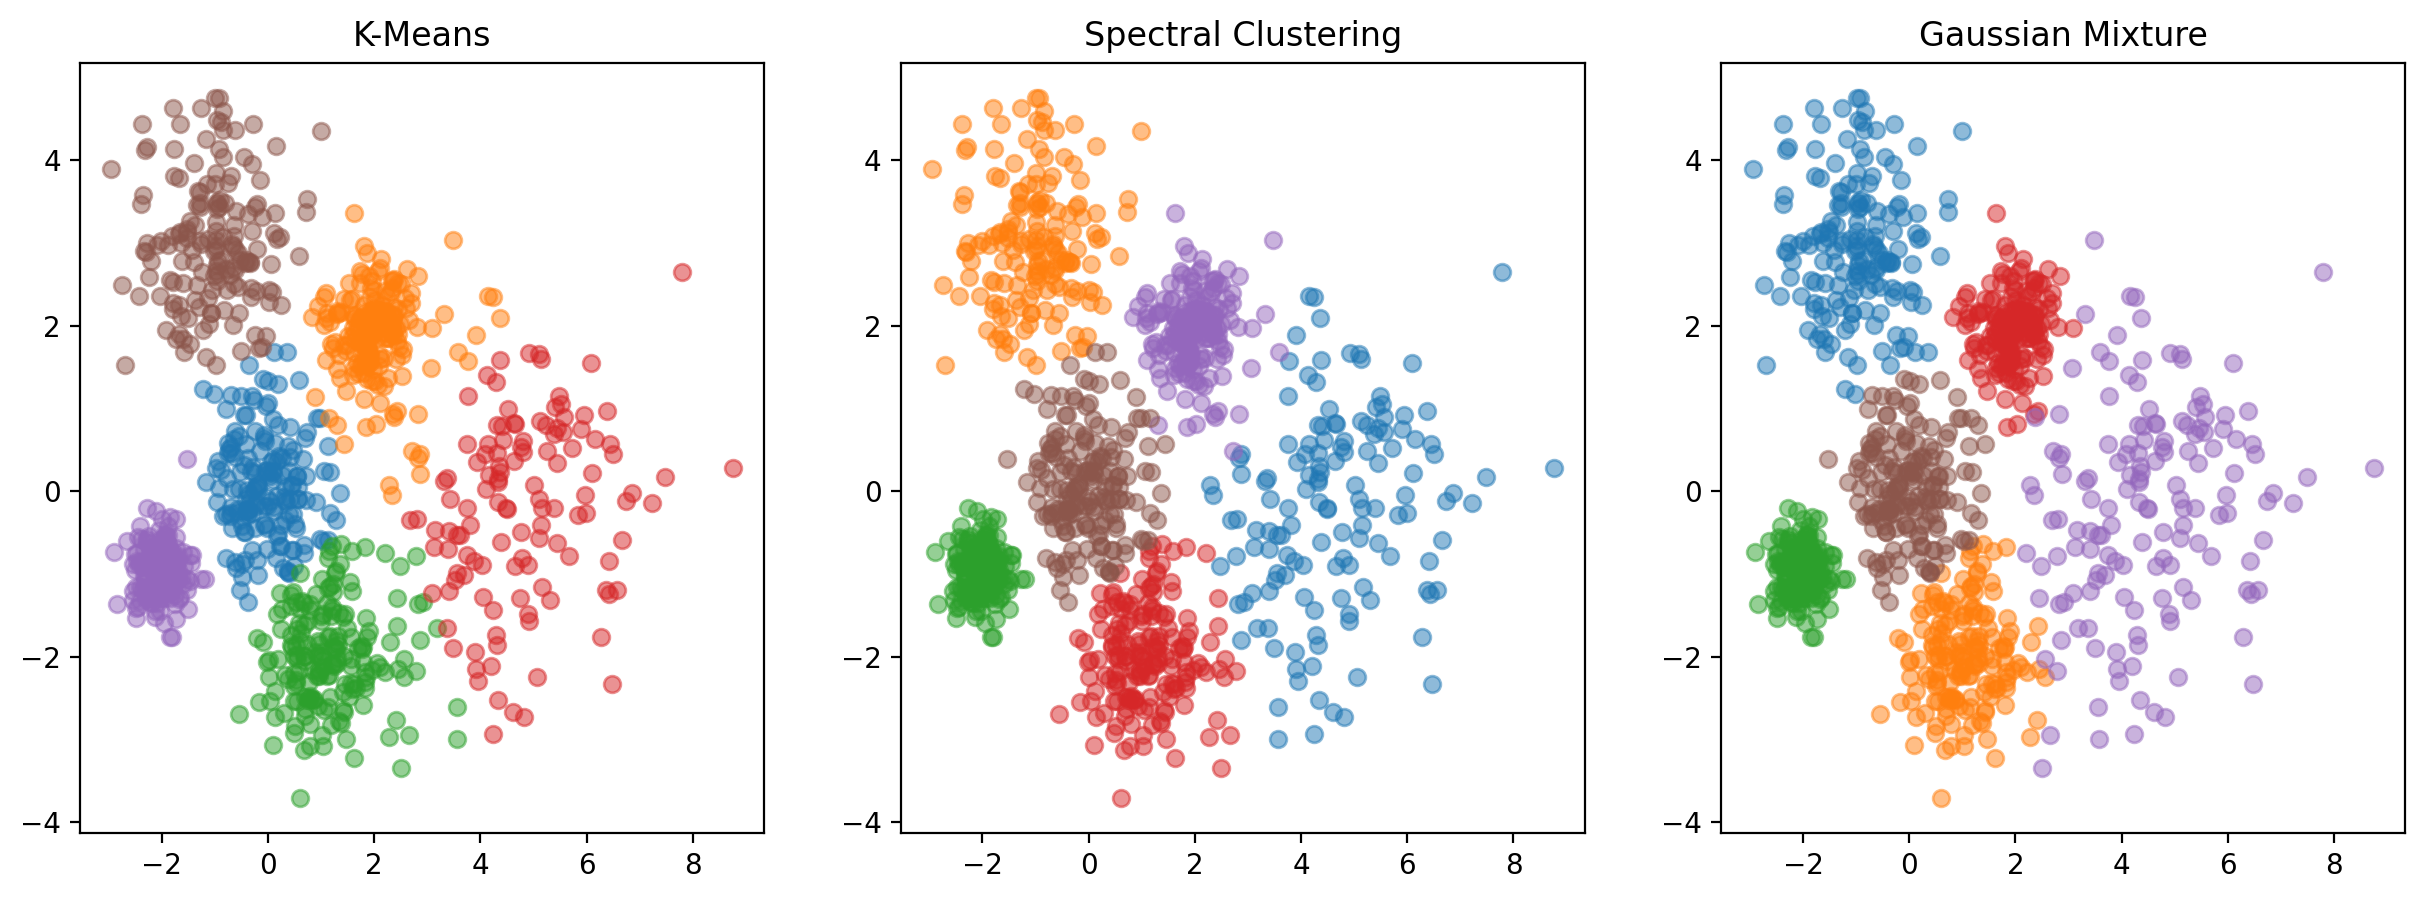

In [35]:
## YOUR CODE GOES HERE
mdl = KMeans(n_clusters=6, init=np.array([[0,0], [2,2], [1,-2], [5,0], [-2,-1], [-1,3]]), n_init=1).fit(x)
centroids = mdl.cluster_centers_
labels = mdl.labels_
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plot_pred(x, labels, ax[0], 'K-Means')
mdl2 = SpectralClustering(n_clusters=6, affinity='nearest_neighbors', n_neighbors=25).fit(x)
labels2 = mdl2.labels_
plot_pred(x, labels2, ax[1], 'Spectral Clustering')
mdl3 = GaussianMixture(n_components=6, covariance_type='full', max_iter=100).fit(x)
plot_pred(x, mdl3.predict(x), ax[2], 'Gaussian Mixture')

plt.show()

Using the parameters you found for the three models above, run each of the clustering algorithms for `n_clust = [2,3,4,5,6,7,8,9]` and compute the sum of squared distances loss for each case using the provided `compute_loss(x, labels)` function, where labels is the cluster assigned to each point by the algorithm. Plot loss versus number of cluster for each your three models in side-by-side subplots using the provided `plot_pred(x, labels, ax, title)` function.

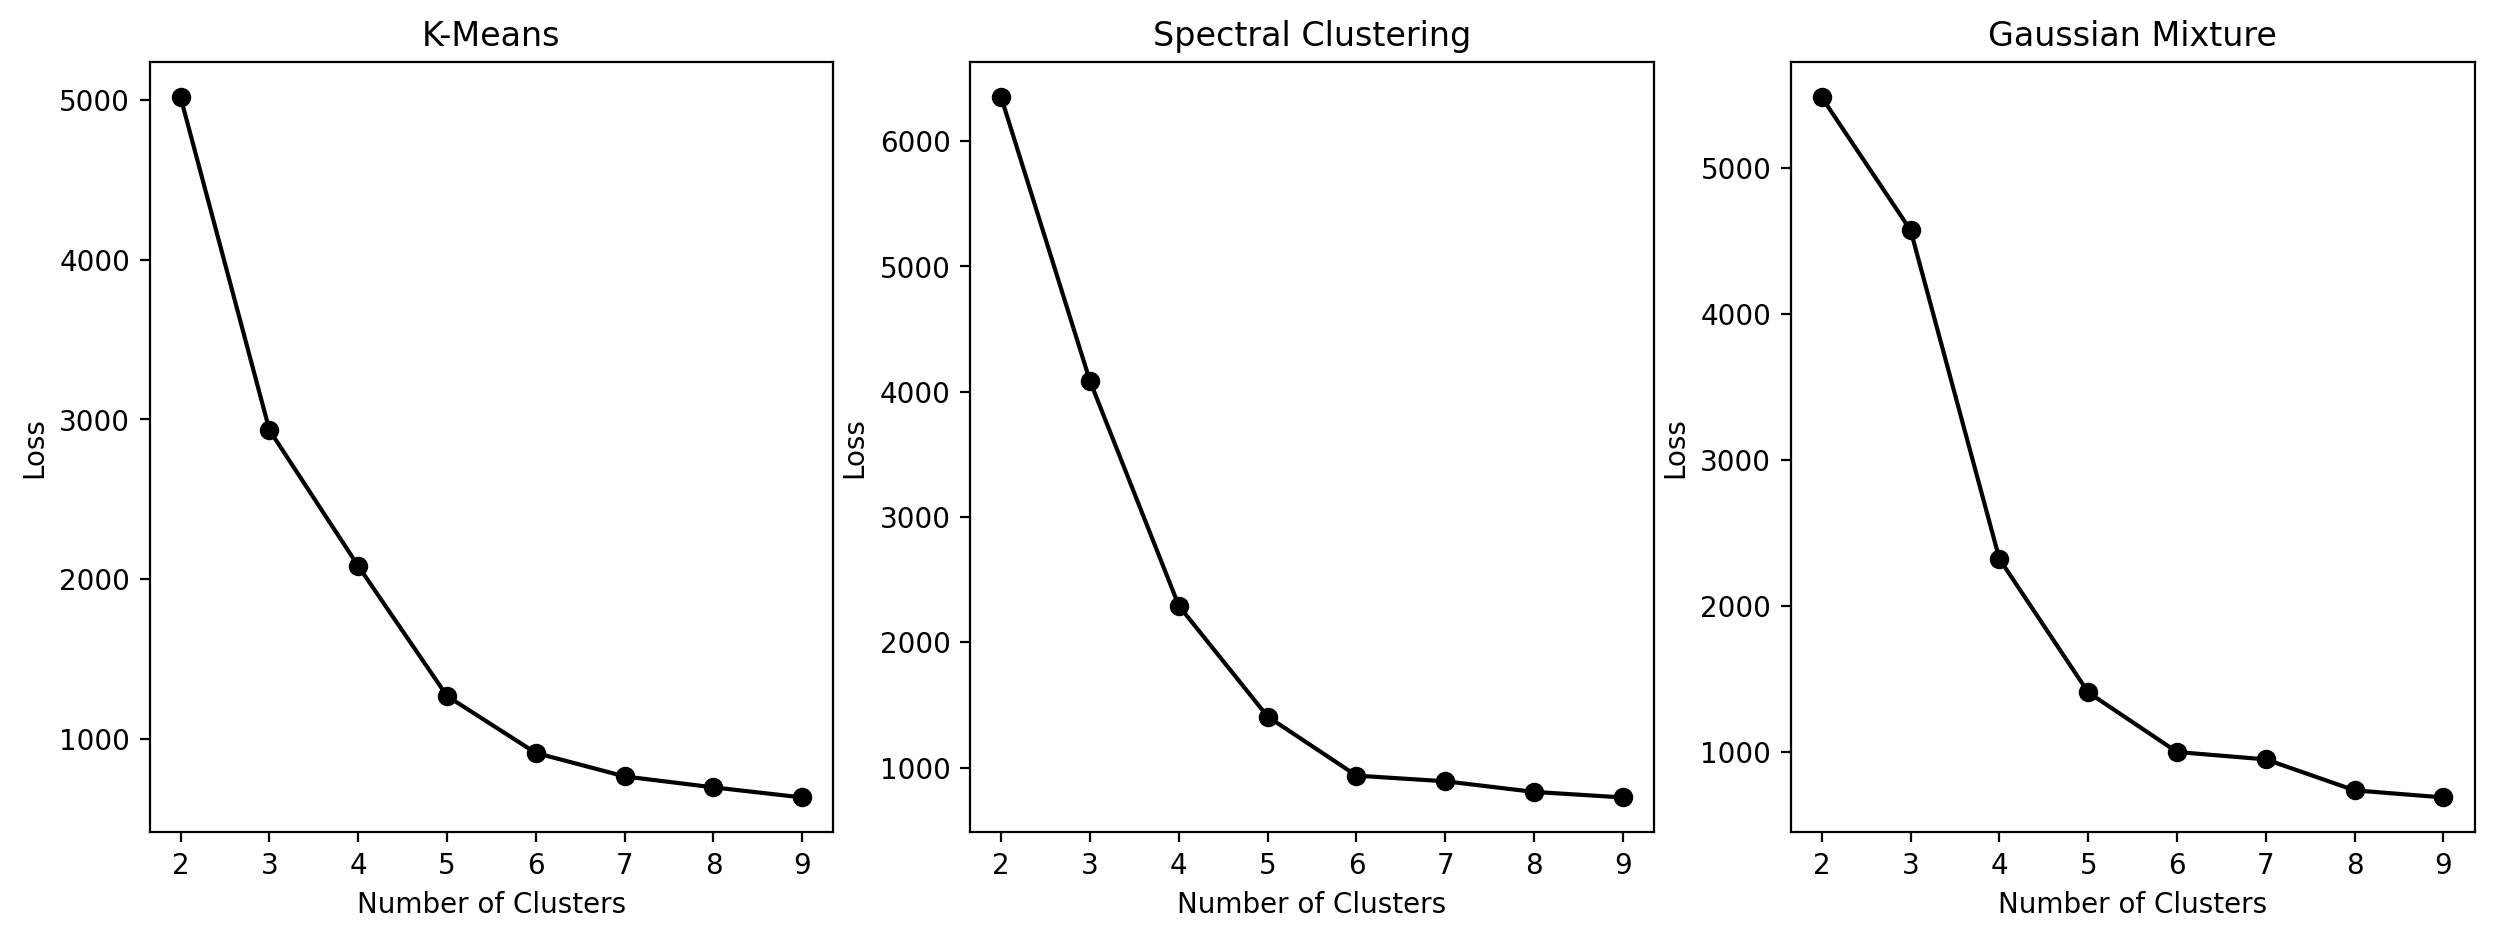

In [36]:
## YOUR CODE GOES HERE
n_clust = [2, 3, 4, 5, 6, 7, 8, 9]
kmeans_loss = []
spectral_loss = []
gmm_loss = []

for clust in n_clust:
    mdl = KMeans(n_clusters=clust, n_init=10).fit(x)
    labels = mdl.labels_
    kmeans_loss.append(compute_loss(x, labels))
    mdl2 = SpectralClustering(n_clusters=clust, affinity='nearest_neighbors', n_neighbors=25).fit(x)
    labels2 = mdl2.labels_
    spectral_loss.append(compute_loss(x, labels2))
    mdl3 = GaussianMixture(n_components=clust, covariance_type='full', max_iter=100).fit(x)
    gmm_loss.append(compute_loss(x, mdl3.predict(x)))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plot_loss(kmeans_loss, ax[0], 'K-Means')
plot_loss(spectral_loss, ax[1], 'Spectral Clustering')
plot_loss(gmm_loss, ax[2], 'Gaussian Mixture')
plt.show()

## Concentric circles dataset
Visualize the "blob" dataset generated below, using a unique color for each cluster of points, where `y` contains the label of each corresponding point in `x`.

In [37]:
## DO NOT MODIFY
x1, y1 = make_circles(n_samples = 400, noise = 0.05, factor = 0.5, random_state = 0)
x2, y2 = make_circles(n_samples = 800, noise = 0.025, factor = 0.75, random_state = 1)

x = np.vstack([x1, x2*2])
y = np.hstack([y1, y2+2])

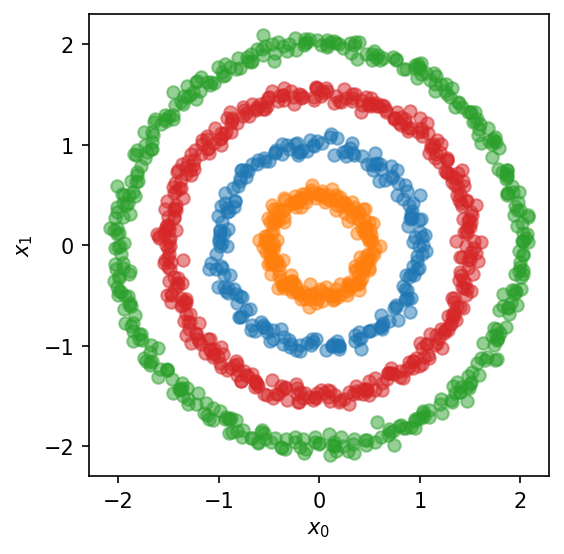

In [38]:
## YOUR CODE GOES HERE
def plotter(x, labels=None, ax=None, title=None):
    if ax is None:
        _, ax = plt.subplots(dpi=150, figsize=(4, 4))
        flag = True
    else:
        flag = False
    for i in range(len(np.unique(labels))):
        ax.scatter(x[labels == i, 0], x[labels == i, 1], alpha=0.5)
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    ax.set_aspect('equal')
    if title is not None:
        ax.set_title(title)
    if flag:
        plt.show()
    else:
        return ax
plotter(x, y)

Use the `sklearn` KMeans, Spectral Clustering, and Gaussian Mixture Model functions to cluster the concentric circle data with 4 clusters, and attempt to modify the parameters until you get satisfactory results. Note: you should get good clustering results with Spectral Clustering, but the KMeans and GMM models will struggle to cluster this dataset well. Plot the results of your three models side-by-side using `plt.subplots` and the provided `plot_pred(x, labels, ax, title)` function.

C:\Users\srech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


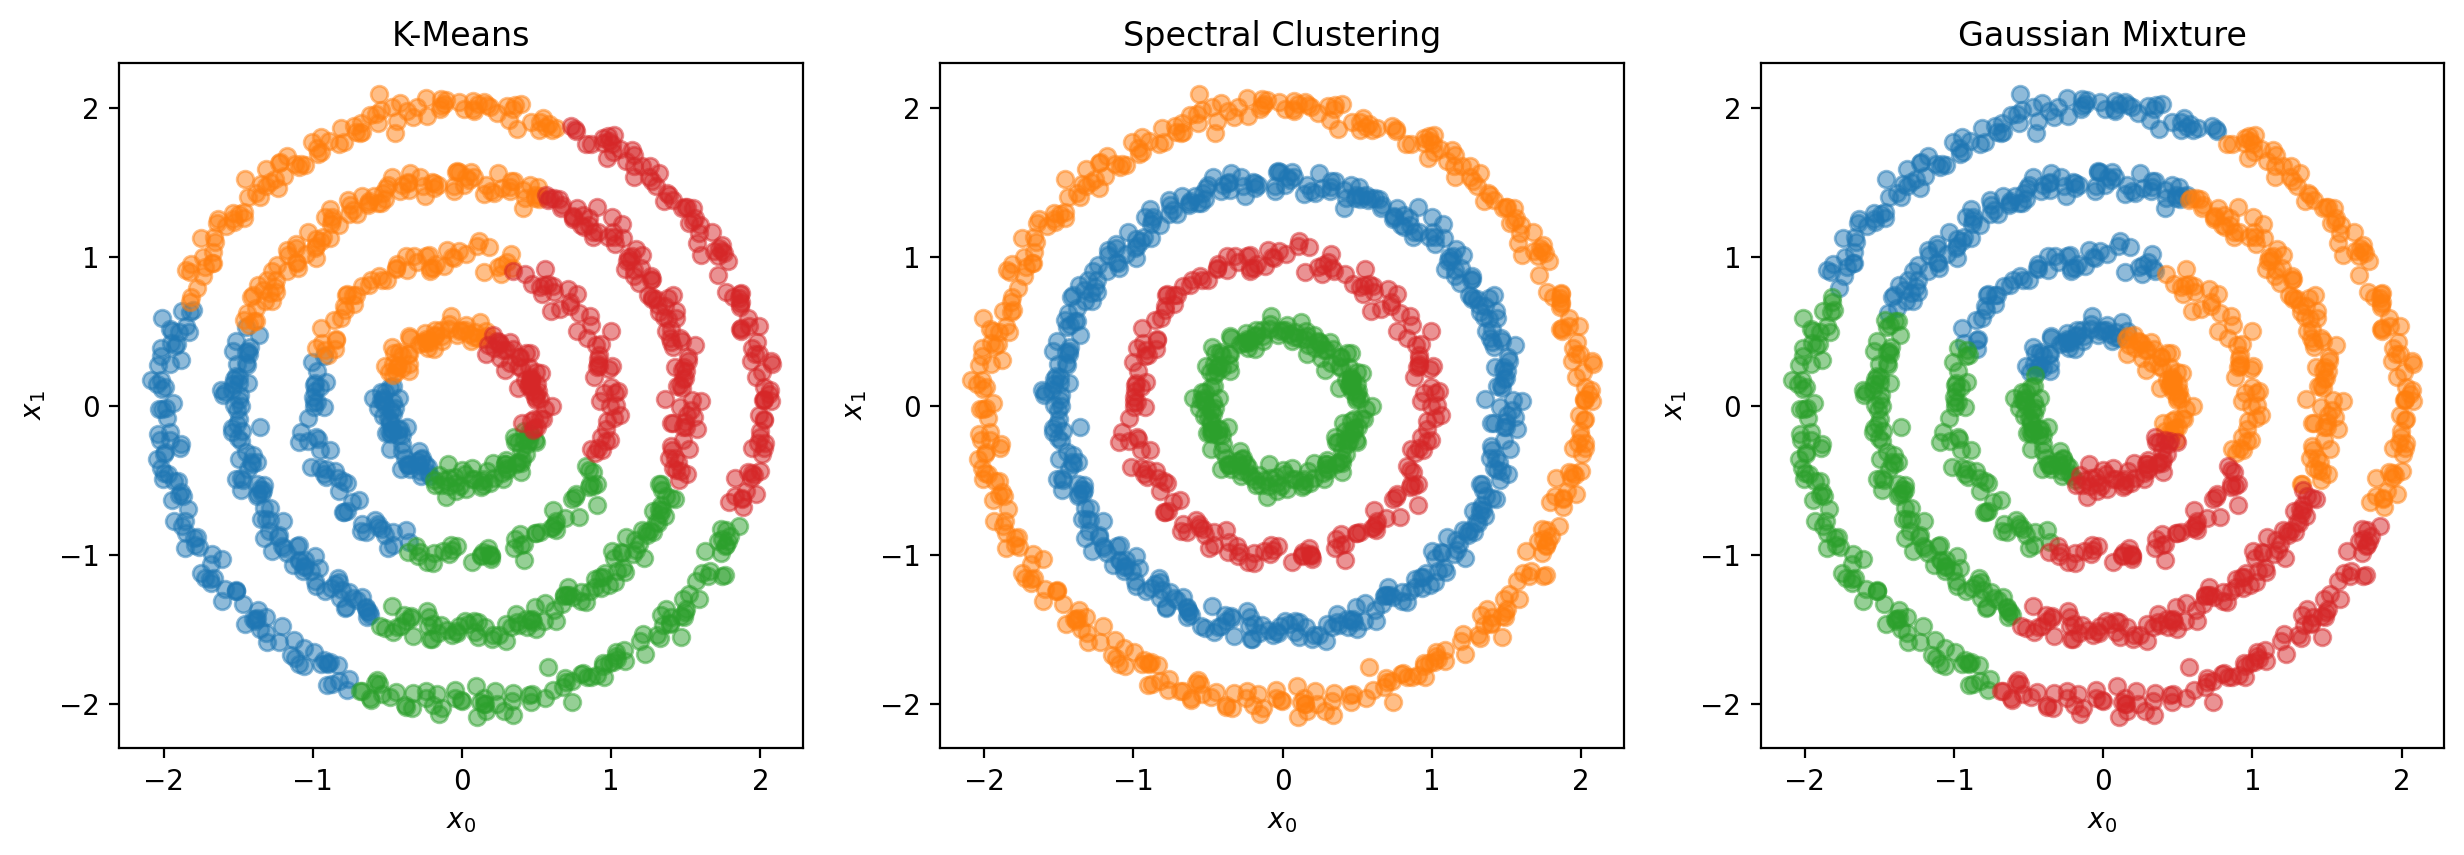

In [39]:
## YOUR CODE GOES HERE
mdl = KMeans(n_clusters=4, n_init=10).fit(x)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plotter(x, mdl.labels_, ax[0], title='K-Means')
mdl2 = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', n_neighbors=10).fit(x)
plotter(x, mdl2.labels_, ax[1], title='Spectral Clustering')
mdl3 = GaussianMixture(n_components=4, covariance_type='full', max_iter=100).fit(x)
plotter(x, mdl3.predict(x), ax[2], title='Gaussian Mixture')

plt.show()

Using the parameters you found for the three models above, run each of the clustering algorithms for `n_clust = [2,3,4,5,6,7,8,9]` and compute the sum of squared distances loss for each case using the provided `compute_loss(x, labels)` function, where labels is the cluster assigned to each point by the algorithm. Plot loss versus number of cluster for each your three models in side-by-side subplots using the provided `plot_pred(x, labels, ax, title)` function.

C:\Users\srech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\srech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\srech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\srech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\srech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embeddin

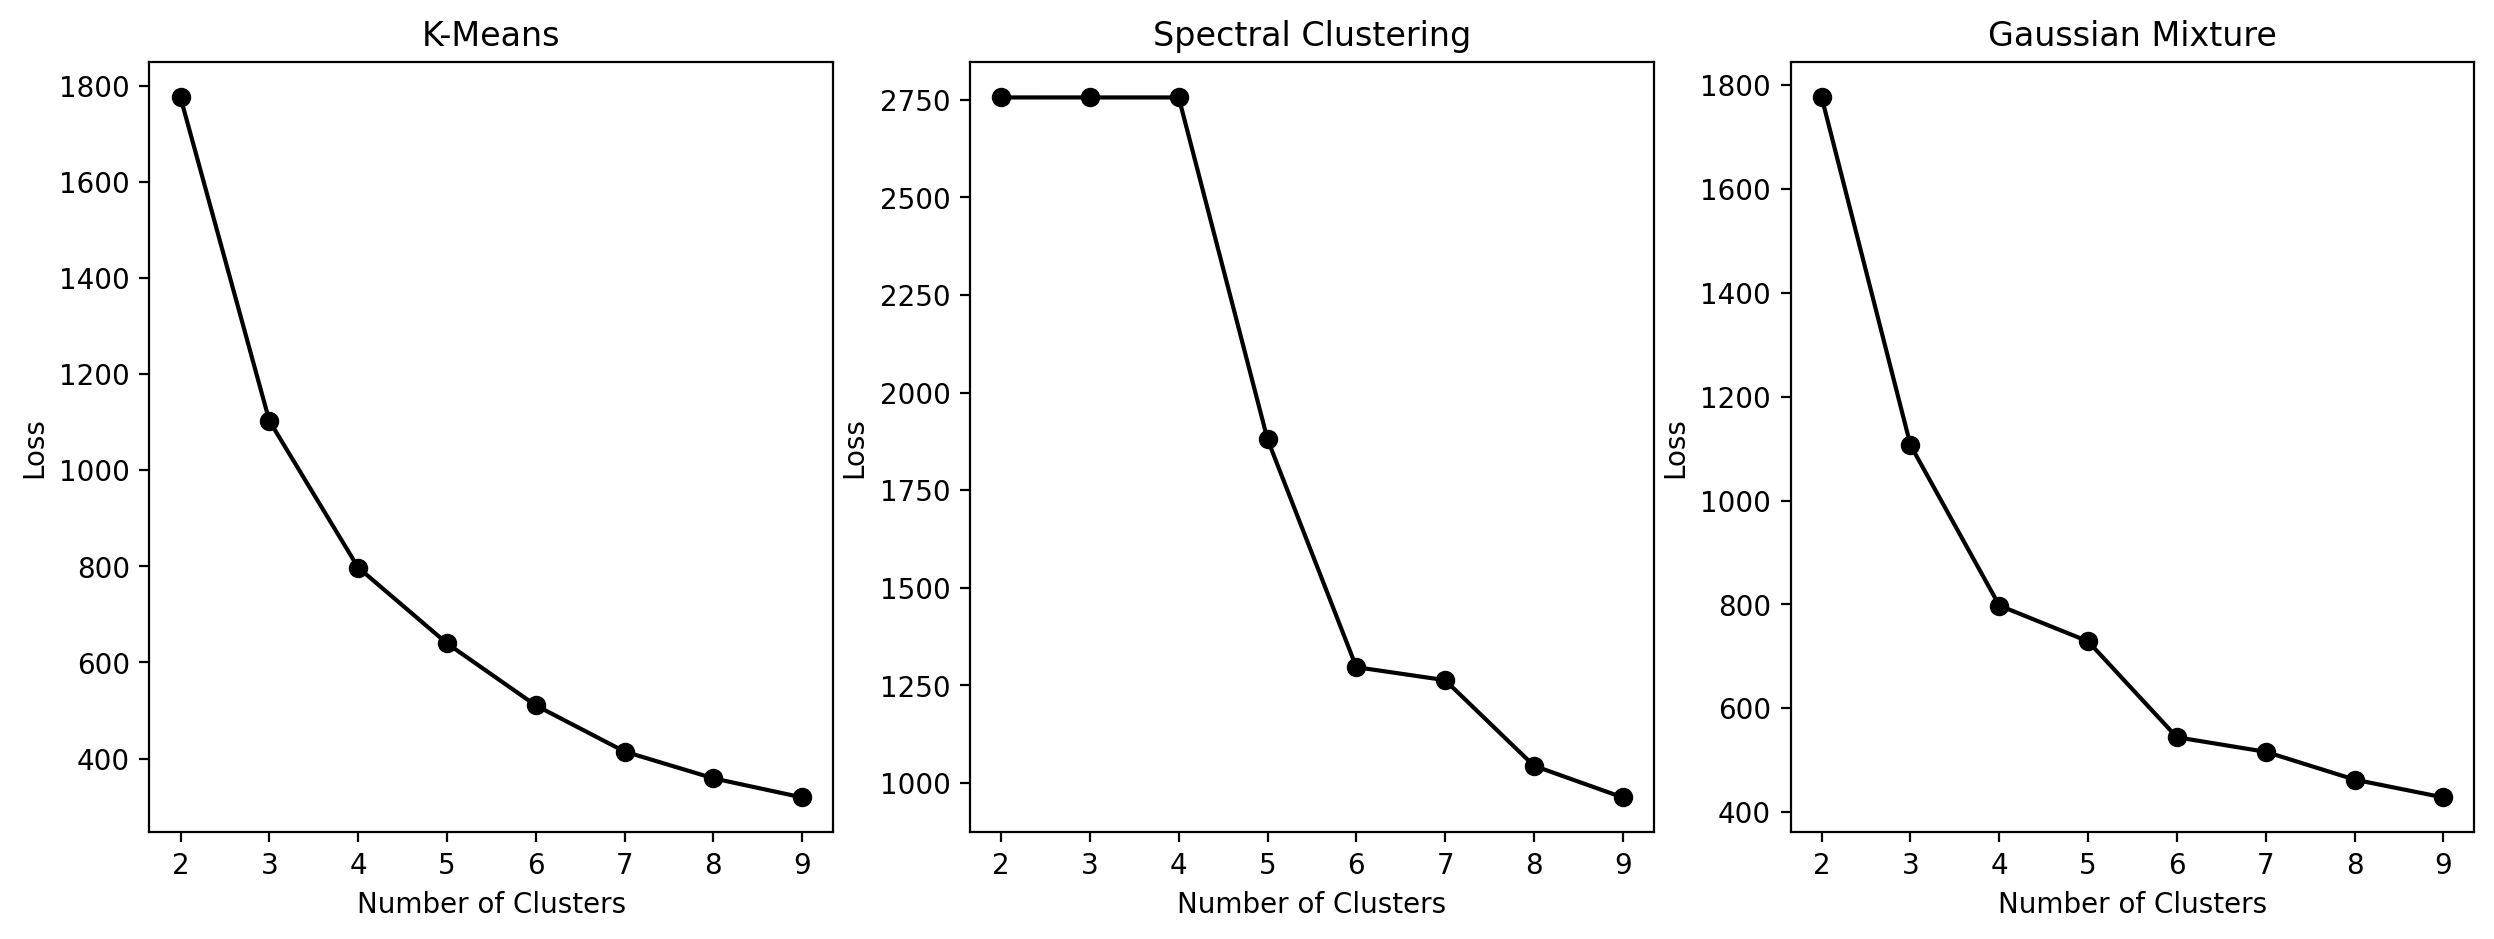

In [40]:
## YOUR CODE GOES HERE
n_clust = [2, 3, 4, 5, 6, 7, 8, 9]
kmeans_loss = []
spectral_loss = []
gmm_loss = []

for clust in n_clust:
    mdl = KMeans(n_clusters=clust, n_init=10).fit(x)
    labels = mdl.labels_
    kmeans_loss.append(compute_loss(x, labels))
    mdl2 = SpectralClustering(n_clusters=clust, affinity='nearest_neighbors', n_neighbors=10).fit(x)
    labels2 = mdl2.labels_
    spectral_loss.append(compute_loss(x, labels2))
    mdl3 = GaussianMixture(n_components=clust, covariance_type='full', max_iter=100).fit(x)
    gmm_loss.append(compute_loss(x, mdl3.predict(x)))
    
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plot_loss(kmeans_loss, ax[0], 'K-Means')
plot_loss(spectral_loss, ax[1], 'Spectral Clustering')
plot_loss(gmm_loss, ax[2], 'Gaussian Mixture')

plt.show()

## Discussion

1. Discuss the performance of the clustering algorithms on the "blob" dataset. Using the elbow method, were you able to identify the number of natural clusters in the dataset for each of the methods? Does the elbow method work better for some algorithms versus others?

*Your response goes here*
Clustering Performance on the "Blob" Dataset: The Gaussian Mixture Model exhibited the highest performance, followed by Spectral Clustering and then K-Means. With the elbow method, it was observed that Spectral Clustering showed a more distinct elbow compared to K-Means and Gaussian Mixture, indicating a clearer identification of the natural number of clusters.

2. Discuss the performance of the clustering algorithms on the concentric circles dataset. Using the elbow method, were you able to identify the number of natural clusters in the dataset for each of the methods?

*Your response goes here*
Clustering Performance on the Concentric Circles Dataset: Spectral Clustering outperformed both K-Means and the Gaussian Mixture Model in this scenario. However, the elbow method was not effective in determining the natural number of clusters for any of these methods on this particular dataset.

3. Does the sum of squared distances work well as a loss function for each of the three clustering algorithms we implemented? Does the sum of squared distance fail on certain types of clusters?

*Your response goes here*
Effectiveness of Sum of Squared Distances as a Loss Function: The sum of squared distances generally served as a good loss function for all three clustering algorithms. However, its effectiveness varied with the type of dataset; particularly, it was less successful for the Spectral Clustering method when applied to the concentric circles dataset. This reflects the limitations of this loss function in certain complex clustering scenarios.